# `trim_nonpercolating_paths`
``trim_nonpercolating_paths`` function is a filter which removes all nonpercolating paths between specified locations.

In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt

## `im`
This function works on both 2D and 3D boolean images of the pore space:

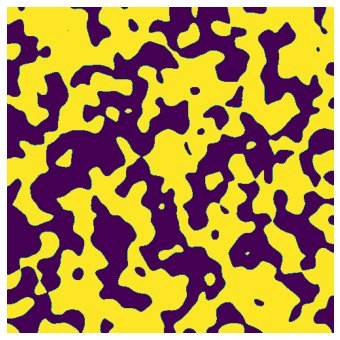

In [2]:
np.random.seed(0)
im = ps.generators.blobs(shape=[500, 500], porosity=0.55, blobiness=1.5)

plt.figure(figsize=[6, 6]);
plt.axis(False);
plt.imshow(im);

## `inlets` and `outlets`
Inlets and outlets are specified by creating ``boolean`` images the same shape as ``im``, with ``True`` values indicating which voxels are inlets and outlets, respectively.  The function then only keeps paths which connect to *both* inlets and outlets:

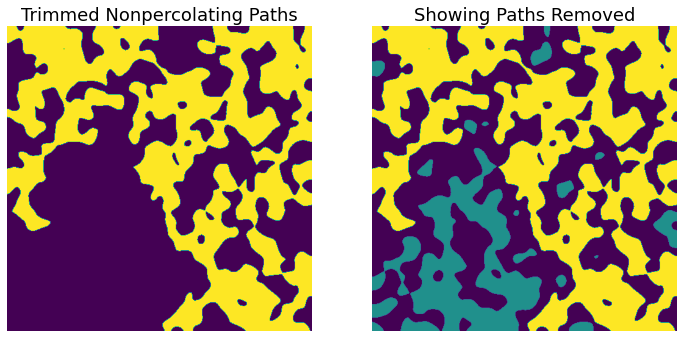

In [3]:
inlets = np.zeros_like(im)
inlets[0, :] = True
outlets = np.zeros_like(im)
outlets[-1, :] = True

x = ps.filters.trim_nonpercolating_paths(im=im, inlets=inlets, outlets=outlets)

fig, ax = plt.subplots(1, 2, figsize=[12, 12]);
ax[0].imshow(x);
ax[0].set_title('Trimmed Nonpercolating Paths', fontdict={'fontsize': 18});
ax[0].axis(False);
ax[1].imshow(x + (im != x)*0.5);
ax[1].set_title('Showing Paths Removed', fontdict={'fontsize': 18});
ax[1].axis(False);